#Data Loading


Drag the Raw_Reviews.csv file into the files directory to load the data.

In [ ]:
import pandas as pd

file_path = '/content/Raw_Reviews.csv'
reviews_data = pd.read_csv(file_path)

reviews_data.head()

,Product_ID,Age,Title,Text_Review,Rating,Type
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops


Commentary: This dataset contains a few columns, such as Product_ID, Age, Title, Text_Review, Rating, and Type. I am guessing that these features indicate the age of ther reviewer, review title, content of the review, rating out of 5, and category of the product. Let's check the different categories within Type, the range of ages and ratings

# Data Processing

##Exploratory Data Analysis

In [ ]:
print("Product Types:", reviews_data['Type'].unique())

Product Types: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]


There are 6 clothing product types.

In [ ]:
min_value_rating = reviews_data['Rating'].min()
max_value_rating = reviews_data['Rating'].max()

range_of_rating = (min_value_rating, max_value_rating)
print("Range of Ratings:", range_of_rating)

Range of Ratings: (1, 5)


Reviews are in a range from 1-5.

In [ ]:
min_value_age = reviews_data['Age'].min()
max_value_age = reviews_data['Age'].max()

range_of_age = (min_value_age, max_value_age)
print("Range of Ages:", range_of_age)

Range of Ages: (18, 99)


Range of ages in the dataset is between 18 and 99 years.

In [ ]:
import nltk as ltk
ltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install matplotlib seaborn

<ipython-input-83-4b8f96544e75>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=reviews_data, palette='viridis')


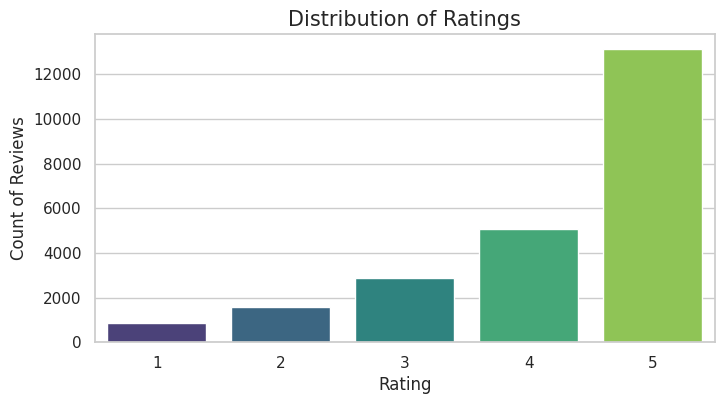

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', data=reviews_data, palette='viridis')

plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)

plt.show()

We see here that most of our reviews are highly rated, so there's a rating imbalance.

##Pre-processing function

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    text = text.lower() #make text to lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove characters that are not words
    text = re.sub(r'\d+', '', text) # remove digits
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS]) #remove english stop words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

reviews_data['Processed_Review'] = reviews_data['Text_Review'].astype(str).apply(preprocess_text)

reviews_data.fillna({'Title': 'No Title', 'Text_Review': ''}, inplace=True)

reviews_data.head()

,Product_ID,Age,Title,Text_Review,Rating,Type,Processed_Review
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,absolutely wonderful silky sexy comfortable
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,Dresses,love dress sooo pretty happened store im glad ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,love love love jumpsuit fun flirty fabulous ti...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,shirt flattering adjustable tie perfect length...


# Data Analysis

##Basic Sentiment Analysis

In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Applying the sentiment analysis on the processed reviews
reviews_data['Sentiments'] = reviews_data['Processed_Review'].apply(lambda x: sia.polarity_scores(x))

reviews_data[['Text_Review', 'Sentiments']].head()

,Text_Review,Sentiments
0,Absolutely wonderful - silky and sexy and comf...,"{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'comp..."
1,Love this dress! it's sooo pretty. i happene...,"{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp..."
2,I had such high hopes for this dress and reall...,"{'neg': 0.042, 'neu': 0.698, 'pos': 0.26, 'com..."
3,"I love, love, love this jumpsuit. it's fun, fl...","{'neg': 0.0, 'neu': 0.096, 'pos': 0.904, 'comp..."
4,This shirt is very flattering to all due to th...,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp..."


## Polarity and Subjectivity Analysis

In [ ]:
from textblob import TextBlob

#Measures how positive or negative the text
reviews_data['Polarity'] = reviews_data['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
#Measures how subjective or opinionated the text
reviews_data['Subjectivity'] = reviews_data['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

reviews_data[['Text_Review', 'Polarity', 'Subjectivity']].head()

,Text_Review,Polarity,Subjectivity
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333
1,Love this dress! it's sooo pretty. i happene...,0.318750,0.725000
2,I had such high hopes for this dress and reall...,0.037400,0.321529
3,"I love, love, love this jumpsuit. it's fun, fl...",0.500000,0.625000
4,This shirt is very flattering to all due to th...,0.750000,0.800000


Creating a function to get the most common words

In [ ]:
from collections import Counter

def get_most_common_words(text_series, num_words=20):
    words = []
    for text in text_series:
        words.extend(text.split())
    return Counter(words).most_common(num_words)

In [ ]:
grouped_reviews = reviews_data.groupby('Type')['Processed_Review'].apply(lambda reviews: ' '.join(reviews))

most_common_words_by_type = {}
for product_type, reviews in grouped_reviews.items():
    words = reviews.split()
    word_counts = Counter(words)
    most_common_words_by_type[product_type] = word_counts.most_common(20)

most_common_words_by_type = pd.DataFrame(most_common_words_by_type)

most_common_words_by_type.head()

,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
0,"(fit, 2101)","(dress, 10093)","(fit, 656)","(jacket, 686)","(love, 3981)","(dress, 89)"
1,"(size, 1909)","(fit, 3025)","(size, 621)","(love, 452)","(fit, 3833)","(size, 58)"
2,"(love, 1556)","(size, 2804)","(love, 612)","(fit, 423)","(size, 3566)","(fit, 55)"
3,"(pant, 1384)","(love, 2323)","(wear, 493)","(size, 395)","(color, 3396)","(like, 53)"
4,"(skirt, 1361)","(im, 1921)","(like, 491)","(look, 365)","(look, 3230)","(look, 53)"


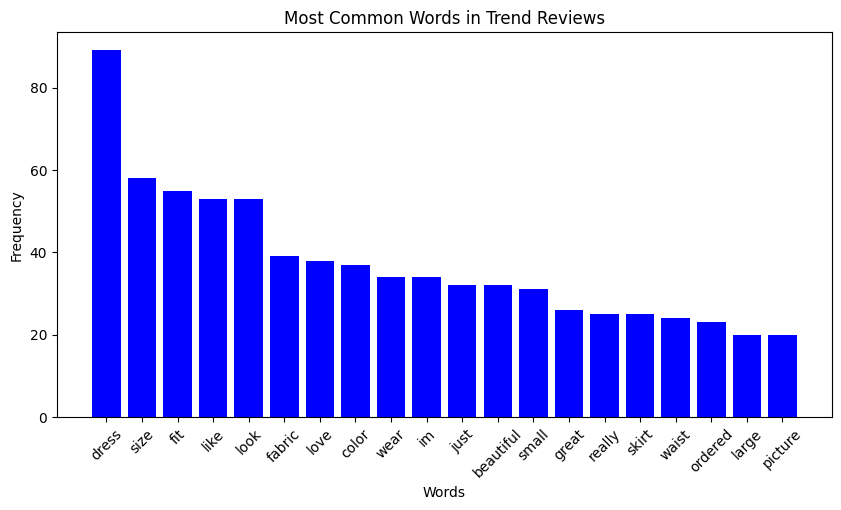

In [ ]:
words, frequencies = zip(*most_common_words_by_type["Trend"])

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Trend Reviews')
plt.xticks(rotation=45)
plt.show()

In [ ]:
subjectivity_threshold = 0.5

def calculate_very_subjective_percentage(group):
    return (group['Subjectivity'] > subjectivity_threshold).mean() * 100

very_subjective_percentage_by_type = reviews_data.groupby('Type').apply(calculate_very_subjective_percentage)

very_subjective_percentage_by_type = pd.DataFrame(very_subjective_percentage_by_type)

very_subjective_percentage_by_type.rename(columns={"Type": "Clothing Type", "0": "Subjectivity"})

very_subjective_percentage_by_type.columns = ['Percentage of Very Subjective Reviews']

very_subjective_percentage_by_type.reset_index(inplace=True)

very_subjective_percentage_by_type.head()

,Type,Percentage of Very Subjective Reviews
0,Bottoms,69.992103
1,Dresses,73.983225
2,Intimate,72.046110
3,Jackets,70.930233
4,Tops,70.567444


In [ ]:
polarity_threshold = 0

def calculate_highly_positive_percentage(group):
    return (group['Polarity'] > polarity_threshold).mean() * 100

highly_positive_percentage_by_type = reviews_data.groupby('Type').apply(calculate_highly_positive_percentage)

highly_positive_percentage_by_type = pd.DataFrame(highly_positive_percentage_by_type)

highly_positive_percentage_by_type.rename(columns={"Type": "Clothing Type", "0": "Polarity"})

highly_positive_percentage_by_type.columns = ['Percentage of Positive Reviews']

highly_positive_percentage_by_type.reset_index(inplace=True)

highly_positive_percentage_by_type.head()

,Type,Percentage of Positive Reviews
0,Bottoms,89.971045
1,Dresses,90.125020
2,Intimate,88.242075
3,Jackets,89.341085
4,Tops,88.345434


In [ ]:
polarity_threshold = 0

def calculate_highly_negative_percentage(group):
    return (group['Polarity'] < polarity_threshold).mean() * 100

highly_negative_percentage_by_type = reviews_data.groupby('Type').apply(calculate_highly_negative_percentage)

highly_negative_percentage_by_type = pd.DataFrame(highly_negative_percentage_by_type)

highly_negative_percentage_by_type.rename(columns={"Type": "Clothing Type", "0": "Polarity"})

highly_negative_percentage_by_type.columns = ['Percentage of Negative Reviews']

highly_negative_percentage_by_type.reset_index(inplace=True)

highly_negative_percentage_by_type.head()

,Type,Percentage of Negative Reviews
0,Bottoms,5.869966
1,Dresses,6.282640
2,Intimate,5.936599
3,Jackets,7.170543
4,Tops,6.753917


We can observe through changes in the polarity threshold that there are more a lot more positive reviews than negative reviews.

In [ ]:
merged_percentages = pd.merge(
    highly_negative_percentage_by_type.rename(columns={"Percentage of Reviews": "Highly Negative"}),
    highly_positive_percentage_by_type.rename(columns={"Percentage of Reviews": "Highly Positive"}),
    on="Type"
)

merged_percentages

,Type,Percentage of Negative Reviews,Percentage of Positive Reviews
0,Bottoms,5.869966,89.971045
1,Dresses,6.282640,90.125020
2,Intimate,5.936599,88.242075
3,Jackets,7.170543,89.341085
4,Tops,6.753917,88.345434
5,Trend,12.605042,85.714286


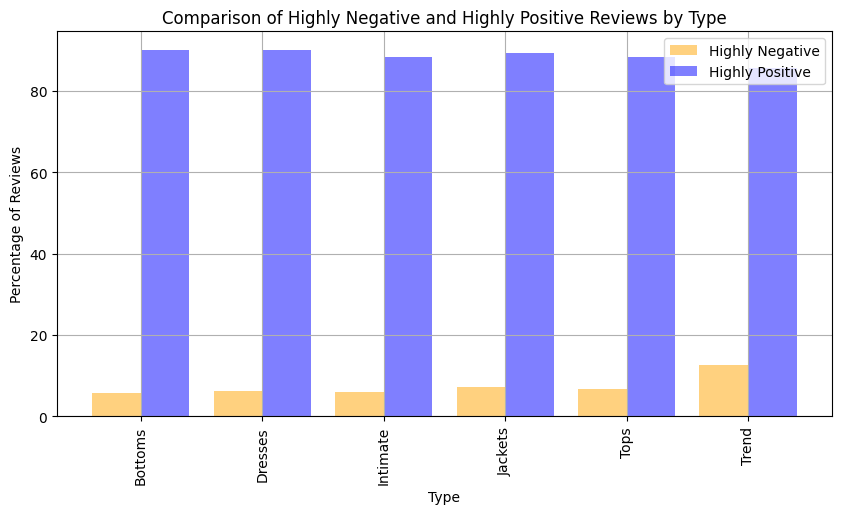

In [ ]:
import matplotlib.pyplot as plt

positions = list(range(len(merged_percentages['Type'])))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 5))

plt.bar([p - width/2 for p in positions], merged_percentages['Percentage of Negative Reviews'], width, alpha=0.5, color='orange', label='Highly Negative')
plt.bar([p + width/2 for p in positions], merged_percentages['Percentage of Positive Reviews'], width, alpha=0.5, color='blue', label='Highly Positive')

plt.xlabel('Type')
plt.ylabel('Percentage of Reviews')
plt.title('Comparison of Highly Negative and Highly Positive Reviews by Type')
plt.xticks(positions, merged_percentages['Type'], rotation=90)
plt.legend(loc='upper right')
plt.grid()
plt.show()


## Running supervised learning models

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.feature_extraction.text import TfidfVectorizer #Convert text to numbers
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score, classification_report #Accuracy

# Split Data 80/20
X_train, X_test, y_train, y_test = train_test_split(
    reviews_data['Processed_Review'], reviews_data['Rating'], test_size=0.2, random_state=42)

# Vectorization and TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model initialization and training
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Prediction and evaluation
predictions = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.6323967645806726
Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.11      0.16       153
           2       0.41      0.18      0.25       317
           3       0.43      0.33      0.37       620
           4       0.44      0.30      0.36      1017
           5       0.72      0.92      0.81      2591

    accuracy                           0.63      4698
   macro avg       0.46      0.37      0.39      4698
weighted avg       0.58      0.63      0.59      4698



63% Accuracy

Save logistic regression model for UI Implementation section.

In [ ]:
pip install joblib

In [ ]:
import joblib
import os

model_directory = './model_directory'
os.makedirs(model_directory, exist_ok=True)

joblib.dump(model, os.path.join(model_directory, 'logistic_regression_model.pkl'))

joblib.dump(vectorizer, os.path.join(model_directory, 'tfidf_vectorizer.pkl'))

['./model_directory/tfidf_vectorizer.pkl']

Now, I will be testing this model on some sample product reviews.

In [ ]:
new_review_text = "This product was great! I loved it and will buy again."

new_review_tfidf = vectorizer.transform([new_review_text])

predicted_rating = model.predict(new_review_tfidf)

print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5


In [ ]:
new_review_text = "This product was terrible! I am never buying this again."

new_review_tfidf = vectorizer.transform([new_review_text])

predicted_rating = model.predict(new_review_tfidf)

print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 1


In [ ]:
new_review_text = "This product was okay. It fit me fairly well but was too costly."

new_review_tfidf = vectorizer.transform([new_review_text])

predicted_rating = model.predict(new_review_tfidf)

print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 4


It appears to be doing quite well!

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

predictions = dt_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.4959557258407833
Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.11      0.12       153
           2       0.20      0.20      0.20       317
           3       0.25      0.22      0.24       620
           4       0.28      0.28      0.28      1017
           5       0.67      0.71      0.69      2591

    accuracy                           0.50      4698
   macro avg       0.31      0.30      0.30      4698
weighted avg       0.48      0.50      0.49      4698



49% Accuracy

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train_tfidf, y_train)

predictions = boosting_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.5962111536824181
Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.07      0.11       153
           2       0.36      0.09      0.14       317
           3       0.44      0.16      0.24       620
           4       0.44      0.15      0.23      1017
           5       0.63      0.97      0.76      2591

    accuracy                           0.60      4698
   macro avg       0.43      0.29      0.30      4698
weighted avg       0.53      0.60      0.51      4698



59% Accuracy

### Simple Neural Network

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
#One-hot encoding labels
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Neural network model
model = Sequential()
model.add(Dense(512, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

#Cross-entropy loss, adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train_tfidf.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_encoded)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
529/529 [==============================] - 29s 52ms/step - loss: 0.9487 - accuracy: 0.6096 - val_loss: 0.8704 - val_accuracy: 0.6413
Epoch 2/10
529/529 [==============================] - 23s 43ms/step - loss: 0.7170 - accuracy: 0.7083 - val_loss: 0.9190 - val_accuracy: 0.6285
Epoch 3/10
529/529 [==============================] - 23s 43ms/step - loss: 0.4324 - accuracy: 0.8410 - val_loss: 1.1678 - val_accuracy: 0.5881
Epoch 4/10
529/529 [==============================] - 32s 60ms/step - loss: 0.1370 - accuracy: 0.9599 - val_loss: 1.5883 - val_accuracy: 0.5849
Epoch 5/10
529/529 [==============================] - 29s 54ms/step - loss: 0.0496 - accuracy: 0.9867 - val_loss: 1.9462 - val_accuracy: 0.5982
Epoch 6/10
529/529 [==============================] - 23s 43ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 2.1691 - val_accuracy: 0.5897
Epoch 7/10
529/529 [==============================] - 21s 40ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 2.3143 - val_accuracy:

59.81% Accuracy

###More Complex Neural Network

In [ ]:
model2 = Sequential()
model2.add(Dense(512, input_dim=X_train_tfidf.shape[1], activation='relu'))
# Adding dropout to reduce overfitting
model.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model2.add(Dense(y_train_encoded.shape[1], activation='softmax'))

#Cross-entropy loss, adam optimizer
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model2.fit(X_train_tfidf.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

loss, accuracy = model2.evaluate(X_test_tfidf.toarray(), y_test_encoded)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
529/529 [==============================] - 21s 38ms/step - loss: 0.9514 - accuracy: 0.6094 - val_loss: 0.8768 - val_accuracy: 0.6472
Epoch 2/10
529/529 [==============================] - 22s 42ms/step - loss: 0.7176 - accuracy: 0.7096 - val_loss: 0.9203 - val_accuracy: 0.6386
Epoch 3/10
529/529 [==============================] - 31s 58ms/step - loss: 0.4401 - accuracy: 0.8377 - val_loss: 1.1473 - val_accuracy: 0.6035
Epoch 4/10
529/529 [==============================] - 37s 69ms/step - loss: 0.1372 - accuracy: 0.9600 - val_loss: 1.5395 - val_accuracy: 0.5966
Epoch 5/10
529/529 [==============================] - 37s 69ms/step - loss: 0.0491 - accuracy: 0.9868 - val_loss: 1.9343 - val_accuracy: 0.6099
Epoch 6/10
529/529 [==============================] - 24s 45ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 2.1456 - val_accuracy: 0.6003
Epoch 7/10
529/529 [==============================] - 21s 39ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 2.2750 - val_accuracy:

60.11% Accuracy

###Transformers

In [ ]:
pip install accelerate -U

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# Function to encode the text data
def encode_examples(texts, labels):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=64,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf'
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = tf.concat(input_ids, 0)
    attention_masks = tf.concat(attention_masks, 0)
    labels = tf.convert_to_tensor(labels)

    dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": input_ids, "attention_mask": attention_masks}, labels))
    dataset = dataset.shuffle(len(labels)).batch(32)
    return dataset

# Prepare datasets
texts = reviews_data['Processed_Review'].tolist()
labels = reviews_data['Rating'].apply(lambda x: x - 1).tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
train_dataset = encode_examples(X_train, y_train)
test_dataset = encode_examples(X_test, y_test)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to

In [ ]:
train_dataset = encode_examples(texts, labels)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(train_dataset, epochs=3, validation_data=test_dataset)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
734/734 [==============================] - 403s 446ms/step - loss: 1.2453 - accuracy: 0.5532 - val_loss: 1.2338 - val_accuracy: 0.5515
Epoch 2/3
734/734 [==============================] - 315s 429ms/step - loss: 1.2291 - accuracy: 0.5568 - val_loss: 1.2971 - val_accuracy: 0.5515
Epoch 3/3
734/734 [==============================] - 315s 429ms/step - loss: 1.2821 - accuracy: 0.5425 - val_loss: 1.2544 - val_accuracy: 0.5515


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_341 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 109486085 (417.66 MB)
Trainable params: 109486085 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Save models

In [ ]:
model.save_pretrained('./my_model_directory')

tokenizer.save_pretrained('./my_model_directory')

('./my_model_directory/tokenizer_config.json',
 './my_model_directory/special_tokens_map.json',
 './my_model_directory/vocab.txt',
 './my_model_directory/added_tokens.json')

In [ ]:
test_text = X_test[3]

encoded_dict = tokenizer.encode_plus(
    test_text,
    add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
    max_length=64,  # Maximum length to pad/truncate to
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='tf',  # Return TensorFlow tensors
)

input_ids = encoded_dict['input_ids']
attention_mask = encoded_dict['attention_mask']

predictions = model.predict({'input_ids': input_ids, 'attention_mask': attention_mask})

probabilities = tf.nn.softmax(predictions.logits, axis=1).numpy()

predicted_class = tf.argmax(probabilities, axis=1).numpy()[0]
predicted_probability = probabilities[0, predicted_class]

print(f"Predicted Class: {predicted_class + 1} (1-indexed)")
print(f"Probability: {predicted_probability:.4f}")

1/1 [==============================] - 13s 13s/step
Predicted Class: 5 (1-indexed)
Probability: 0.5948
